
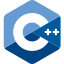
<br>

<div style="text-align:center; font-size:200%;">
 <b>Stack und Heap</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 Stack und Heap.ipynb -->
<!-- slides/module_140_collections/topic_120_stack_heap.cpp -->


Programme haben zwei Speicherbereiche: Stack und Heap.

- Stack:
  - Speicherbereich für lokale Variablen.
  - Wird automatisch verwaltet.
  - Variablen werden beim Verlassen eines Blocks automatisch entfernt.
- Heap:
  - Speicherbereich für dynamisch allozierte Variablen.
  - Muss manuell verwaltet werden.

In [ ]:
int x{1};
{
    int y{2};
}
{
    int z{3};
}


<img src="../img/stack-heap-01.png" width="60%">


<img src="../img/stack-heap-02.png" width="60%">


<img src="../img/stack-heap-03.png" width="60%">


<img src="../img/stack-heap-04.png" width="60%">

In [ ]:
void f(int i) {
    int j{i + 1};
}

In [ ]:
void g() {
    int k{1};
    f(k);
}


<img src="../img/stack-heap-11.png" width="80%">


<img src="../img/stack-heap-12.png" width="80%">


<img src="../img/stack-heap-13.png" width="80%">


<img src="../img/stack-heap-14.png" width="80%">


<img src="../img/stack-heap-15.png" width="80%">


<img src="../img/stack-heap-21.png" width="80%">


<img src="../img/stack-heap-22.png" width="80%">


<img src="../img/stack-heap-23.png" width="80%">


<img src="../img/stack-heap-24.png" width="80%">


<img src="../img/stack-heap-25.png" width="80%">


<img src="../img/stack-heap-26.png" width="80%">


<img src="../img/stack-heap-32.png" width="60%">


<img src="../img/stack-heap-34.png" width="60%">


<img src="../img/stack-heap-35.png" width="60%">


<img src="../img/stack-heap-36.png" width="60%">


<img src="../img/stack-heap-42.png" width="60%">


<img src="../img/stack-heap-43.png" width="60%">


<img src="../img/stack-heap-44.png" width="60%">


<img src="../img/stack-heap-45.png" width="60%">


<img src="../img/stack-heap-46.png" width="60%">


- `bad_f` gibt einen Zeiger auf ein lokales Objekt zurück.
- `bad_g` speichert diesen Zeiger in `pk`.
- `pk` ist ein "dangling Pointer".
- Das Dereferenzieren eines "dangling Pointers" ist undefiniertes Verhalten.


<div style="text-align:left; font-size:200%; max-width: 100%; line-height: 125%;">
<a href="https://isocpp.github.io/CppCoreGuidelines/CppCoreGuidelines#f43-never-directly-or-indirectly-return-a-pointer-or-a-reference-to-a-local-object">
CG: F.43: Never (directly or indirectly) return a pointer or a reference to  a local object
</a>
</div>


`T*` (oder `T&`) als Rückgabewert sind typischerweise:
- Zeiger oder Referenz, die als Parameter übergeben wurde
   - Potentiell auch Teil eines Objekts
- Zeiger auf statisches Objekt
- Zeiger auf Objekt auf dem Heap
  - Stattdessen `std::unique_ptr<T>` oder `std::shared_ptr<T>` verwenden!


- Eine statische Variable wird zur Kompilezeit angelegt.
- Sie wird initialisiert, wenn der Kontrollfluss zum erstenmal die Definition
  erreicht.
- Bei jedem weiteren Aufruf der Funktion behält sie ihren Wert.
- Sie wird zerstört, wenn das Programm beendet wird.


- Objekte auf dem Heap werden zur Laufzeit angelegt.
- Sie werden mit einer `new`-Expression erzeugt.
  - `new` gibt einen Zeiger auf das angelegte Objekt zurück.
- Sie müssen mit einer `delete`-Anweisung zerstört werden.


<img src="../img/stack-heap-51.png" width="40%">


<img src="../img/stack-heap-52.png" width="40%">


<img src="../img/stack-heap-53.png" width="40%">


<img src="../img/stack-heap-63.png" width="60%">


<img src="../img/stack-heap-64.png" width="80%">


<img src="../img/stack-heap-65.png" width="80%">


<img src="../img/stack-heap-66.png" width="80%">


<img src="../img/stack-heap-67.png" width="60%">


<img src="../img/stack-heap-68.png" width="60%">


## Mini-Workshop: Heap und Referenzen

- Referenzen kann man in vielen Fällen genau so wie Zeiger behandeln.
- Insbesondere ist die Rückgabe von Referenzen auf automatische Variablen zu
  undefiniertes Verhalten.

Welche der folgenden Funktionen sind korrekt? Warum?

In [ ]:
int& f1(int& i) {
    return i;
}

In [ ]:
int& f2(int i) {
    return i;
}

In [ ]:
int& f3(int i) {
    int k{i + 1};
    return k;
}

In [ ]:
int& f4(int& i) {
    int k{i + 1};
    return k;
}

In [ ]:
struct MyStruct {
    int i;
};

In [ ]:
int& f5(MyStruct& s) {
    return s.i;
}

*Antwort:* 